# Στατική με Μητρώα - Άσκηση για το σπίτι 1

In [1]:
import sympy as sym
from sympy import Matrix
# from common.statics.mitroiki_functs import K_without_axial
# from common.statics.mitroiki_functs import P_point_load_at_distance_a, P_uniformly_distributed_load
# from common.statics.mitroiki_functs import round_expr
# import common.statics.shape_functions as sf 
from statics.mitroiki_functs import K_without_axial
from statics.mitroiki_functs import P_point_load_at_distance_a, P_uniformly_distributed_load
from statics.mitroiki_functs import round_expr
import statics.shape_functions as sf 

import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt

from IPython.display import Image

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\panagop\AppData\Local\Temp\ipykernel_12116\4125210237.py:1: SyntaxWarning: invalid escape sequence '\e'
  Image('img\ekfonisi.png', width=800)


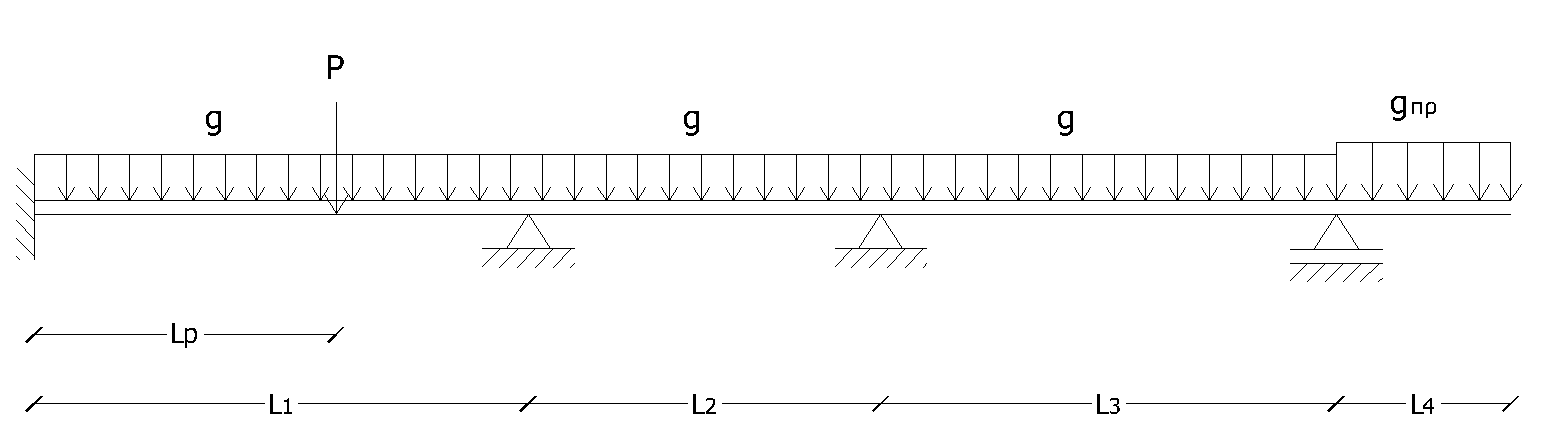

In [2]:
Image('img\ekfonisi.png', width=800)

## Δεδομένα φοιτητή

In [3]:
μ = 0
ν = 0

In [4]:
L1 = 5+(0.1*μ)+(0.2*ν)
L2 =3+(0.1*(μ+ν))
L3 = 4.2+(0.2*μ)+(0.2*ν)
L4 = 1.6+(0.1*ν)
g = 20+(0.1*(μ+ν))
gπρ = 14+(0.2*(μ+ν))
P_load = 25+(0.3*μ)+(0.4*ν)
E = (28 + 0.1*(μ+ν)) * 10**6
b=0.25
h=0.7

In [5]:
Lp = (3/4)*L1
I = b*h**3/12

In [6]:
print(f'L1 = {L1:.3f}m')
print(f'L2 = {L2:.3f}m')
print(f'L3 = {L3:.3f}m')
print(f'L4 = {L4:.3f}m')
print(f'g = {g:.3f}kN/m')
print(f'gπρ = {gπρ:.3f}kN/m')
print(f'P = {P_load:.3f}kN')
print(f'E = {E:.3e}kPa')
print(f'b = {b:.3f}m')
print(f'h = {h:.3f}m')
print(f'Lp = {Lp:.3f}m')
print(f'I = {I:.3e}m4')

L1 = 5.000m
L2 = 3.000m
L3 = 4.200m
L4 = 1.600m
g = 20.000kN/m
gπρ = 14.000kN/m
P = 25.000kN
E = 2.800e+07kPa
b = 0.250m
h = 0.700m
Lp = 3.750m
I = 7.146e-03m4


## Καθορισμός μητρώων και διανυσμάτων

### Μητρώα στιβαρότητας

#### Python functions

#### Μητρώο στιβαρότητας στοιχείου 1

In [7]:
K1 = K_without_axial(E=E, I=I, L=L1)
round_expr(K1, 1)

Matrix([
[ 19208.0,  48020.0, -19208.0,  48020.0],
[ 48020.0, 160066.7, -48020.0,  80033.3],
[-19208.0, -48020.0,  19208.0, -48020.0],
[ 48020.0,  80033.3, -48020.0, 160066.7]])

#### Μητρώο στιβαρότητας στοιχείου 2

In [8]:
K2 = K_without_axial(E=E, I=I, L=L2)
round_expr(K2, 1)

Matrix([
[ 88925.9,  133388.9,  -88925.9,  133388.9],
[133388.9,  266777.8, -133388.9,  133388.9],
[-88925.9, -133388.9,   88925.9, -133388.9],
[133388.9,  133388.9, -133388.9,  266777.8]])

In [9]:
K3 = K_without_axial(E=E, I=I, L=L3)
round_expr(K3, 1)

Matrix([
[ 32407.4,  68055.6, -32407.4,  68055.6],
[ 68055.6, 190555.6, -68055.6,  95277.8],
[-32407.4, -68055.6,  32407.4, -68055.6],
[ 68055.6,  95277.8, -68055.6, 190555.6]])

#### Συνολικό μητρώο στιβαρότητας (συνδυασμός στοιχέιων 1 και 2)

In [10]:
# Δημιουργώ αρχικά ένα μηδενικό μητρώο 6x6 με όλα τα στοιχεία του μηδενικά
K = sym.zeros(8, 8)
K[:4, :4] += K1
K[2:6, 2:6] += K2
K[4:, 4:] += K3

round_expr(K, 1)



Matrix([
[ 19208.0,  48020.0, -19208.0,   48020.0,         0,        0,        0,        0],
[ 48020.0, 160066.7, -48020.0,   80033.3,         0,        0,        0,        0],
[-19208.0, -48020.0, 108133.9,   85368.9,  -88925.9, 133388.9,        0,        0],
[ 48020.0,  80033.3,  85368.9,  426844.4, -133388.9, 133388.9,        0,        0],
[       0,        0, -88925.9, -133388.9,  121333.3, -65333.3, -32407.4,  68055.6],
[       0,        0, 133388.9,  133388.9,  -65333.3, 457333.3, -68055.6,  95277.8],
[       0,        0,        0,         0,  -32407.4, -68055.6,  32407.4, -68055.6],
[       0,        0,        0,         0,   68055.6,  95277.8, -68055.6, 190555.6]])

### Μητρώα εξωτερικών φορτίσεων

#### Μητρώο εξωτερικών φορτίσεων στοιχείου 1

Το στοιχείο 1 έχει τα εξωτερικά φορτία που αναππτύσσονται λόγω του ομοιόμορφου φορτίου q και του σημειακού φορτίου P.

In [11]:
P1_point = P_point_load_at_distance_a(P=P_load, L=L1, a=Lp)
round_expr(P1_point, 2)

Matrix([
[ -3.91],
[ -5.86],
[-21.09],
[ 17.58]])

In [12]:
P1_uniform = P_uniformly_distributed_load(q=g, L=L1)
round_expr(P1_uniform, 2)

Matrix([
[ -50.0],
[-41.67],
[ -50.0],
[ 41.67]])

οπότε το συνολικό μητρώο εξωτερικών φορτίσεων για το στοιχείο 1 είναι το άθροισμα των 2 παραπάνω μητρώων:

In [13]:
P1 = P1_point + P1_uniform
round_expr(P1, 2)

Matrix([
[-53.91],
[-47.53],
[-71.09],
[ 59.24]])

Το στοιχείο 2 φέρει τα φορτία μόνο του ομοιόμορφου φορτίου q.

In [14]:
P2 = P2_uniform = P_uniformly_distributed_load(q=g, L=L2)
round_expr(P2, 2)

Matrix([
[-30.0],
[-15.0],
[-30.0],
[ 15.0]])

Το στοιχείο 3 φέρει τα φορτία του ομοιόμορφου φορτίου q και τα φορτία που μεταφέρονται από τον πρόβολο.

In [15]:
P3_uniform = P_uniformly_distributed_load(q=g, L=L3)
P3_uniform

Matrix([
[-42.0],
[-29.4],
[-42.0],
[ 29.4]])

In [16]:
P3_provolos = Matrix([[0],
                    [0], 
                    [-gπρ*L4],
                    [-gπρ*L4**2/2]])
P3_provolos

Matrix([
[     0],
[     0],
[ -22.4],
[-17.92]])

οπότε το συνολικό μητρώο εξωτερικών φορτίσεων για το στοιχείο 1 είναι το άθροισμα των 2 παραπάνω μητρώων:

In [17]:
P3 = P3_uniform + P3_provolos
round_expr(P3, 2)

Matrix([
[-42.0],
[-29.4],
[-64.4],
[11.48]])

Το τελικό μητρώο φορτίσεων προκύπτει από την επαλληλία μητρώων των 2 παραπάνω στοιχείων:

In [18]:
P = sym.zeros(8, 1)
P[:4, 0] += P1
P[2:6, 0] += P2
P[4:, 0] += P3
round_expr(P, 2)

Matrix([
[ -53.91],
[ -47.53],
[-101.09],
[  44.24],
[  -72.0],
[  -14.4],
[  -64.4],
[  11.48]])

### Μητρώο παραμορφώσεων

Το μητρώο παραμορφώσεων U θα είναι διαστάσεων 8x1 (2 παραμορφώσεις: κατακόρυφη μετακίνηση και στροφή σε κάθε κόμβο).
Από τις συνθήκες στήριξης αναγνωρίζεται ότι οι μη μηδενικές τιμές θα είναι αυτές των U4, U6 και U8.

In [19]:
U4, U6, U8 = sym.symbols('U4 U6 U8')
U = Matrix([[0], [0], [0], [U4], [0], [U6], [0], [U8]])
U

Matrix([
[ 0],
[ 0],
[ 0],
[U4],
[ 0],
[U6],
[ 0],
[U8]])

### Μητρώο αντιδράσεων

Το μητρώο αντιδράσεων R θα είναι διαστάσεων 8x1 (2 αντιδράσεις: κατακόρυφη δύναμη και ροπή σε κάθε κόμβο).
Από τις συνθήκες στήριξης αναγνωρίζεται ότι οι R4, R6 και R8 θα έχουν μηδενικές τιμές.

In [20]:
R1, R2, R3, R5, R7 = sym.symbols('R1 R2 R3 R5 R7')
R = Matrix([[R1], [R2], [R3], [0], [R5], [0], [R7], [0]])
R

Matrix([
[R1],
[R2],
[R3],
[ 0],
[R5],
[ 0],
[R7],
[ 0]])

## Επίλυση

Στόχος είναι η επίλυση της μητρωικής εξίσωσης:

$ [k] \cdot [u] = [P] + [R]$

στην οποία όμως υπάρχουν 2 άγνωστοι, οι πίνακες $[u]$ και $[R]$.

### Αντικατάσταση γνωστών τιμών στα μητρώα αντιδράσεων και παραμορφώσεων

Με δεδομένο ότι είναι γνωστές οι μηδενικές τιμές των μητρώων αντιδράσεων και παραμορφώσεων, αρκεί η επίλυση να περιοριστεί μόνο στα υπομητρώα που σχετίζονται με τις μη μηδενικές τιμές των παραμορφώσεων και συγκεκριμένα στις γραμμές/στήλες 4, 6 και 8.

### Διαχωρισμός σε υπομητρώα

In [21]:
k_468 = Matrix(K[[3, 5, 7], [3, 5, 7]])
p_468 = Matrix(P[[3, 5, 7], 0])
r_468 = Matrix(R[[3, 5, 7], 0])
u_468 = Matrix(U[[3, 5, 7], 0])


In [22]:
round_expr(k_468, 1)

Matrix([
[426844.4, 133388.9,        0],
[133388.9, 457333.3,  95277.8],
[       0,  95277.8, 190555.6]])

In [23]:
r_468

Matrix([
[0],
[0],
[0]])

In [24]:
u_468

Matrix([
[U4],
[U6],
[U8]])

In [25]:
round_expr(p_468, 2)

Matrix([
[44.24],
[-14.4],
[11.48]])

Από τον πολλαπλασιασμό των $ [k_{468}] \cdot [u_{468}]$ και την εξίσωση του γινομένου με το $[P_{468}]$ προκύπτει ένα σύστημα 3x3 εξισώσεων με 3 άγνωστους.

In [26]:
round_expr(k_468 * u_468, 1)

Matrix([
[             426844.4*U4 + 133388.9*U6],
[133388.9*U4 + 457333.3*U6 + 95277.8*U8],
[              95277.8*U6 + 190555.6*U8]])

Από τη λύση του συστήματος προκύπτουν οι τιμές των παραμορφώσεων $U_4$, $U_6$ και $U_8$.

### Εναλλακτική επίλυση με πράξεις μητρώων


Η εξίσωση:

$ [k_{468}] \cdot [u_{468}] = [P_{468}] + [R_{468}]$

για μηδενικό $[R_{468}]$ μπορεί να γραφτεί και ως:

$ [k_{468}] \cdot [u_{468}] = [P_{468}]$

οπότε 

$ [k_{468}]^{-1}[k_{468}] \cdot [u_{468}] = [k_{468}]^{-1} \cdot [P_{468}]$

$ [u_{468}] = [k_{468}]^{-1} \cdot [P_{468}]$

Το μητρώο $[k_{468}]$ είναι πλέον αντιστρέψιμο

In [27]:
# Το αντίστροφο του μητρώου στιβαρότητας για τα στοιχεία 346
k_468.inv()

Matrix([
[ 2.60813657739696e-6, -8.49160746129242e-7,  4.24580373064621e-7],
[-8.49160746129242e-7,  2.71731438761358e-6, -1.35865719380679e-6],
[ 4.24580373064621e-7, -1.35865719380679e-6,  5.92714200798211e-6]])

In [28]:
u_468_solution = Matrix(k_468.inv() * p_468)
round_expr(u_468_solution, 6)

Matrix([
[0.000132],
[ -9.2e-5],
[0.000106]])

Το παραπάνω αποτέλεσμα είναι οι τιμές του μητρώου $[u_{468}]$, άρα των παραμορφώσεων $U_4$, $U_4$ και $U_8$.

In [29]:
u_solution = U.subs(U4, u_468_solution[0]).subs(U6, u_468_solution[1]).subs(U8, u_468_solution[2])
round_expr(u_solution, 6)

Matrix([
[       0],
[       0],
[       0],
[0.000132],
[       0],
[ -9.2e-5],
[       0],
[0.000106]])

Η αρχική μητρωική εξίσωση έχει πλέον ως μόνο άγνωστο το μητρώο [R]:

$ [k] \cdot [u] = [P] + [R]$

οπότε:

$[R] = [k] \cdot [u] - [P]$

In [30]:
r_solution = Matrix(K * u_solution - P)
round_expr(r_solution, 2)


Matrix([
[ 60.27],
[ 58.13],
[100.09],
[   0.0],
[  67.6],
[   0.0],
[ 63.44],
[     0]])

## Υπολογισμός μετακίνησης στο μέσο του L2

Θα χρησιμοποιηθούν οι συναρτήσεις μορφής.
Αρχικά δημιουργείται το διάνυσμα των μετακινήσεων, όπου εμφανίζεται και ο αξονικός βαθμός ελευθερίας (6x1, θα μπορούσε φυσικά και να χρησιμοποιηθεί και 4x1 χωρίς τα αξονικά)

In [31]:
U2_with_axial = Matrix([[0], [0], [u_solution[3]], [0], [0], [u_solution[5]]])
round_expr(U2_with_axial, 7)

Matrix([
[        0],
[        0],
[0.0001325],
[        0],
[        0],
[ -9.23e-5]])

In [32]:
F = sf.F(L2, L2/2)
F

Matrix([
[0.5,   0,     0, 0.5,   0,      0],
[  0, 0.5, 0.375,   0, 1.0, -0.375]])

In [33]:
round_expr(sf.Y(F, U2_with_axial), 7)

Matrix([
[      0],
[8.43e-5]])

Η δεύτερη γραμμή του παραπάνω μητρώου είναι η βύθιση στο μέσο του L2

## Διαγράμματα εντατικών μεγεθών

Υπολογίζονται επιλύοντας τον φορέα με το OpenSees. Οπότε η επίλυση μπορεί να χρησιμοποιηθεί και για τον έλεγχο των τιμών των αντιδράσεων στις στηρίξεις

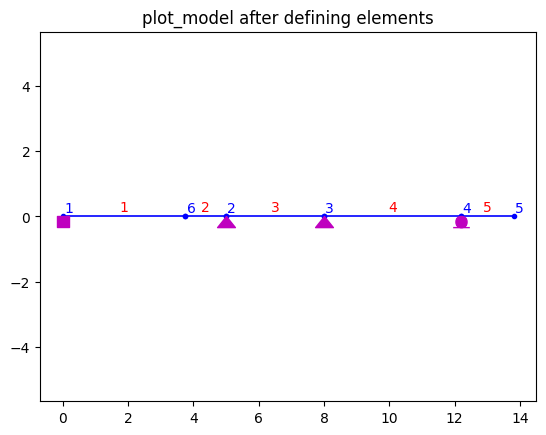

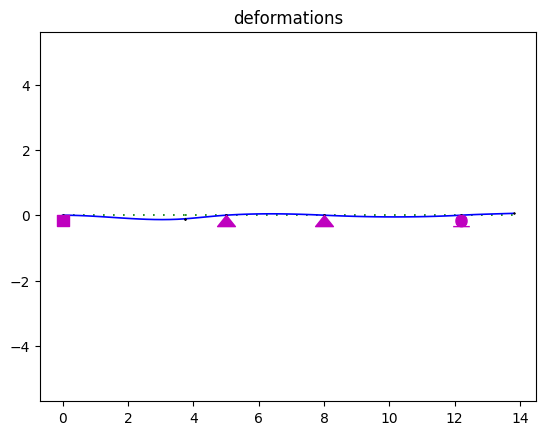

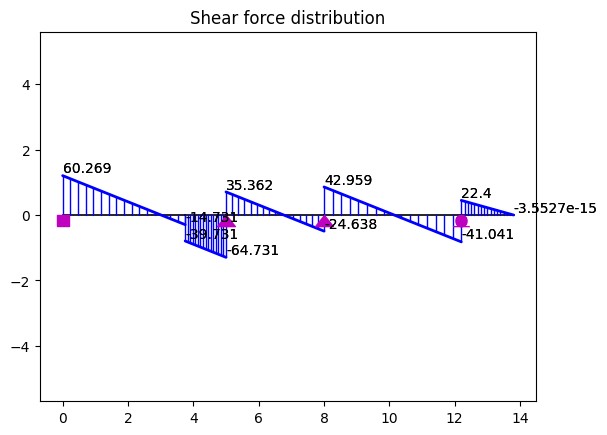

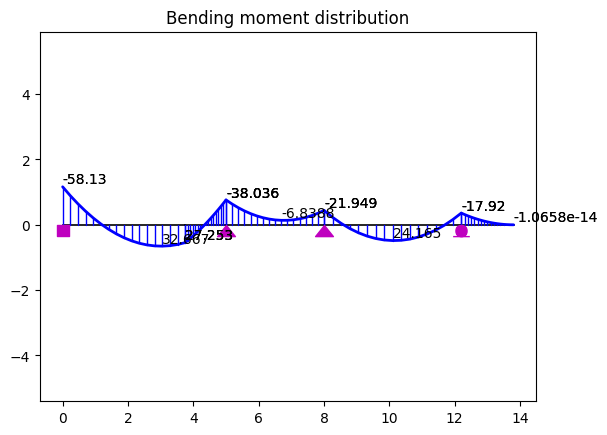

In [35]:
ops.wipe()
ops.model('basic', '-ndm', 2, '-ndf', 3)

A = 1000.

ops.node(1, 0., 0)
ops.node(2, L1, 0)
ops.node(3, L1+L2, 0)
ops.node(4, L1+L2+L3, 0)
ops.node(5, L1+L2+L3+L4, 0)
ops.node(6, Lp, 0)

ops.fix(1, 1, 1, 1)
ops.fix(2, 1, 1, 0)
ops.fix(3, 1, 1, 0)
ops.fix(4, 0, 1, 0)

# opsv.plot_model()
# plt.title('plot_model before defining elements')

ops.geomTransf('Linear', 1)

# elements
# ops.element('elasticBeamColumn', 1, 1, 2, A, E, I, 1)
# ops.element('elasticBeamColumn', 2, 2, 3, A, E, I, 1)
# ops.element('elasticBeamColumn', 3, 3, 4, A, E, I, 1)
# ops.element('elasticBeamColumn', 4, 4, 5, A, E, I, 1)

ops.element('elasticBeamColumn', 1, 1, 6, A, E, I, 1)
ops.element('elasticBeamColumn', 2, 6, 2, A, E, I, 1)
ops.element('elasticBeamColumn', 3, 2, 3, A, E, I, 1)
ops.element('elasticBeamColumn', 4, 3, 4, A, E, I, 1)
ops.element('elasticBeamColumn', 5, 4, 5, A, E, I, 1)


# loads
ops.timeSeries('Constant', 1)
ops.pattern('Plain', 1, 1)

# ops.eleLoad('-ele', 1, '-type', '-beamPoint', -P_load, Lp/L1)
ops.eleLoad('-ele', 1, '-type', '-beamUniform', -g)
ops.eleLoad('-ele', 2, '-type', '-beamUniform', -g)
ops.eleLoad('-ele', 3, '-type', '-beamUniform', -g)
ops.eleLoad('-ele', 4, '-type', '-beamUniform', -g)
ops.eleLoad('-ele', 5, '-type', '-beamUniform', -gπρ)
ops.load(6, 0., -P_load, 0.)


# analysis
ops.constraints('Transformation')
ops.numberer('RCM')
ops.system('BandGeneral')
ops.test('NormDispIncr', 1.0e-6, 6, 2)
ops.algorithm('Linear')
ops.integrator('LoadControl', 1)
ops.analysis('Static')
ops.analyze(1)

# results
# ops.printModel()
opsv.plot_model()
plt.title('plot_model after defining elements')

# opsv.plot_loads_2d(10, 2)
# plt.title('loads')

sfac = 500.
opsv.plot_defo(sfac)
plt.title('deformations')

sfacN, sfacV, sfacM = 5.e-3, 2.e-2, 2.e-2

# opsv.section_force_diagram_2d('N', sfacN)
# plt.title('Axial force distribution')

opsv.section_force_diagram_2d('T', sfacV)
plt.title('Shear force distribution')

opsv.section_force_diagram_2d('M', sfacM)
plt.title('Bending moment distribution')


plt.show()

